In [1]:
%matplotlib inline
import numpy as np
import PP as pp
import matplotlib.pyplot as plt

### Defining agents:

In [2]:
ag1 = pp.agent_pp(np.array([0.5,0.5]), np.array([[0.85,0.15],[0.45,0.55]]))
ag1.evaluate_post()

In [3]:
ag2 = pp.agent_pp(np.array([0.5,0.5]), np.array([[0.85,0.15],[0.45,0.55]]))
ag2.evaluate_post()

### Simulation:

In [30]:
def simulate_pp(n, ag1, ag2, truth_1, truth_2, randomised = None):
    payoff_1 = 0
    
    for i in range(n):
        u = np.random.uniform()
        if randomised is None:
            rep_1 = ag1.report(u,truth_1)
        else:
            if np.random.uniform() < randomised:
                rep_1 = ag1.report(u,truth_1)
            else:
                rep_1 = ag1.report(u,~truth_1)
        rep_2 = ag2.report(u,truth_2)

        payoff_1 += pp.logarithmic(ag1, rep_1, ag2, rep_2)
        
    return payoff_1

In [13]:
truthful = [simulate_pp(1000, ag1, ag2, True, True) for i in range(1000)]

In [14]:
liar = [simulate_pp(1000, ag1, ag2, False, True) for i in range(1000)]

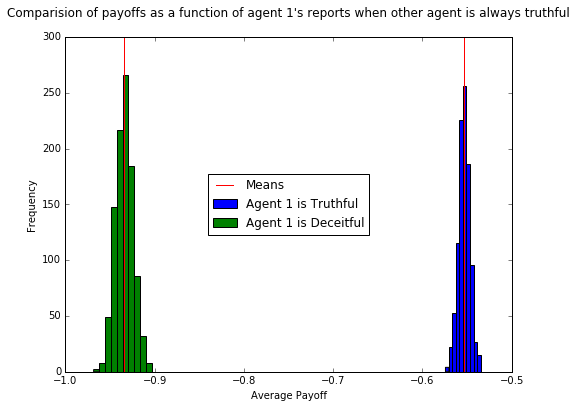

In [23]:
plt.figure(figsize=(8,6))
plt.hist([t/1000 for t in truthful], label = 'Agent 1 is Truthful')
plt.hist([l/1000 for l in liar], label = 'Agent 1 is Deceitful')
plt.axvline(np.mean([t/1000 for t in truthful]), color = 'red',label = 'Means')
plt.axvline(np.mean([l/1000 for l in liar]), color = 'red')
plt.xlabel('Average Payoff')
plt.ylabel('Frequency')
plt.legend(loc = 10)
plt.title("Comparision of payoffs as a function of agent 1's reports when other agent is always truthful\n")
plt.show()

In [32]:
rand_r = [simulate_pp(1000, ag1, ag2, True, True,0.5) for i in range(1000)]

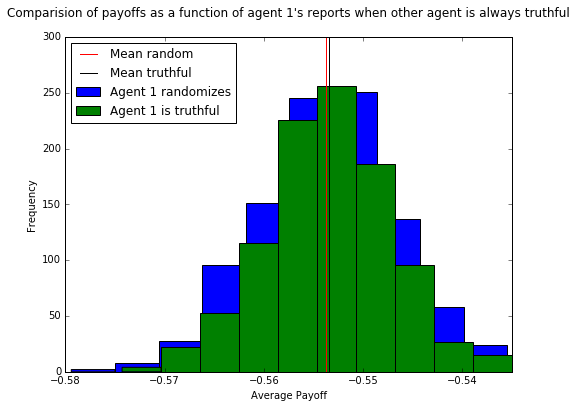

In [36]:
plt.figure(figsize=(8,6))
plt.hist([t/1000 for t in rand_r], label = 'Agent 1 randomizes')
plt.hist([l/1000 for l in truthful], label = 'Agent 1 is truthful')
plt.axvline(np.mean([t/1000 for t in rand_r]), color = 'red',label = 'Mean random')
plt.axvline(np.mean([l/1000 for l in truthful]), color = 'black', label = 'Mean truthful')
plt.xlabel('Average Payoff')
plt.ylabel('Frequency')
plt.legend(loc = 2)
plt.title("Comparision of payoffs as a function of agent 1's reports when other agent is always truthful\n")
plt.show()

In [8]:
ag3 = pp.agent_pp(np.array([0.5,0.5]), np.array([[0.25,0.75],[0.45,0.55]]))
ag3.evaluate_post()

In [9]:
truthful_2 = [simulate_pp(1000, ag1, ag3, True, True) for i in range(1000)]
liar_2 = [simulate_pp(1000, ag1, ag3, False, True) for i in range(1000)]

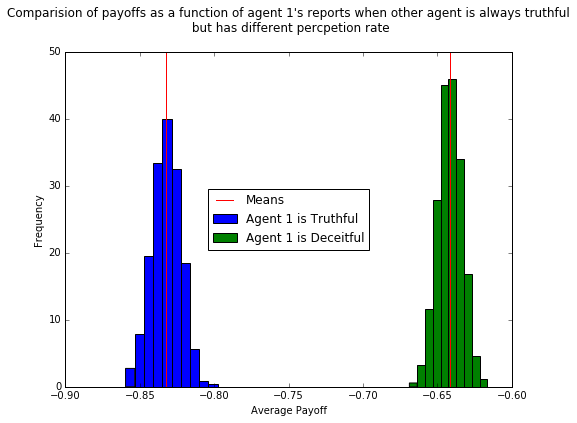

In [25]:
plt.figure(figsize=(8,6))
plt.hist([t/1000 for t in truthful_2], normed = True, label = 'Agent 1 is Truthful')
plt.hist([l/1000 for l in liar_2], normed = True, label = 'Agent 1 is Deceitful')
plt.axvline(np.mean([t/1000 for t in truthful_2]), color = 'red',label = 'Means')
plt.axvline(np.mean([l/1000 for l in liar_2]), color = 'red')
plt.xlabel('Average Payoff')
plt.ylabel('Frequency')
plt.legend(loc = 10)
plt.title("Comparision of payoffs as a function of agent 1's reports when other agent is always truthful\n but has different percpetion rate\n")
plt.show()

In [26]:
ag4 = pp.agent_pp(np.array([0.5,0.5]), np.array([[0.6,0.4],[0.5,0.5]]))
ag4.evaluate_post()

In [27]:
truthful_3 = [simulate_pp(1000, ag1, ag4, True, True) for i in range(1000)]
liar_3 = [simulate_pp(1000, ag1, ag4, False, True) for i in range(1000)]

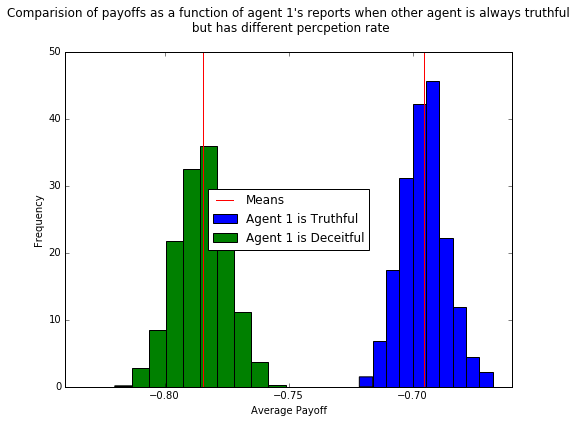

In [28]:
plt.figure(figsize=(8,6))
plt.hist([t/1000 for t in truthful_3], normed = True, label = 'Agent 1 is Truthful')
plt.hist([l/1000 for l in liar_3], normed = True, label = 'Agent 1 is Deceitful')
plt.axvline(np.mean([t/1000 for t in truthful_3]), color = 'red',label = 'Means')
plt.axvline(np.mean([l/1000 for l in liar_3]), color = 'red')
plt.xlabel('Average Payoff')
plt.ylabel('Frequency')
plt.legend(loc = 10)
plt.title("Comparision of payoffs as a function of agent 1's reports when other agent is always truthful\n but has different percpetion rate\n")
plt.show()